# General Split-Apply-Combine

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline


Vegas = pd.read_csv('vegas.csv')
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()
Vegas.columns

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_56410/1923321273.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()


Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

<img src = "s-a-c.png" width = "500">

In [5]:
# split apply combibe

In [6]:
# aggregation is one example of split-apply-combine

In [7]:
# constrints

In [8]:
# every grop has to be reduced to a single row

In [9]:
# all variable are evaluated independently

In [10]:
# these are all limitations of the groupby method

---

In [11]:
# hence the apply method

In [12]:
# process each group independely 

# greates a series or df

# pandas will try to glue them together vertically

---

### general groupby info

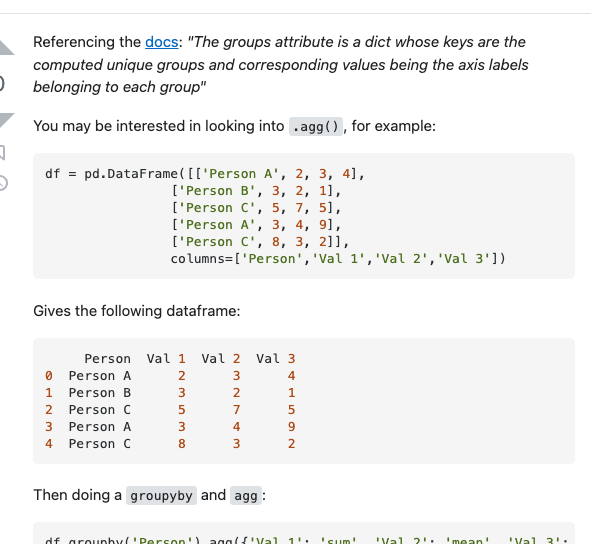

---

# apply

# Example 1

In [13]:
# get information of 3 reviewere for each hotel with the most review writing experience

### this means, we will have 3 rows for each hotel (not one value)
#### hence will need a more generalized method

In [14]:
by_hotel = Vegas.groupby('hotel_name')

In [15]:
by_hotel

In [16]:
by_hotel.head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0            USA          11                 4             13      5   
1            USA         119                21             75      3   
2            USA          36                 9             25      5   
3             UK          14                 7             14      4   
4         Canada           5                 5              2      4   
..           ...         ...               ...            ...    ...   
480       Canada          20                13             17      4   
481          USA          15                 3              4      3   
482        Italy         189                72            129      4   
483          USA          25                19             27      3   
484          USA          33                11             12      5   

    period_of_stay traveler_type pool  gym tennis_court  spa casino  \
0          Dec-Feb       Friends   NO  YES           NO   NO    YES   
1          Dec-Feb      Business   NO  YES           NO   NO    YES   
2          Mar-May      Families   NO  YES           NO   NO    YES   
3          Mar-May       Friends   NO  YES           NO   NO    YES   
4          Mar-May          Solo   NO  YES           NO   NO    YES   
..             ...           ...  ...  ...          ...  ...    ...   
480        Dec-Feb       Couples  YES  YES           NO  YES    YES   
481        Dec-Feb      Families  YES  YES           NO  YES    YES   
482        Dec-Feb          Solo  YES  YES           NO  YES    YES   
483        Dec-Feb       Couples  YES  YES           NO  YES    YES   
484        Mar-May      Business  YES  YES           NO  YES    YES   

    free_internet                               hotel_name hotel_stars  \
0             YES   Circus Circus Hotel & Casino Las Vegas           3   
1             YES   Circus Circus Hotel & Casino Las Vegas           3   
2             YES   Circus Circus Hotel & Casino Las Vegas           3   
3             YES   Circus Circus Hotel & Casino Las Vegas           3   
4             YES   Circus Circus Hotel & Casino Las Vegas           3   
..            ...                                      ...         ...   
480           YES  The Westin las Vegas Hotel Casino & Spa           4   
481           YES  The Westin las Vegas Hotel Casino & Spa           4   
482           YES  The Westin las Vegas Hotel Casino & Spa           4   
483           YES  The Westin las Vegas Hotel Casino & Spa           4   
484           YES  The Westin las Vegas Hotel Casino & Spa           4   

     nr_rooms user_continent  member_years review_month review_weekday  
0        3773  North America             9      January       Thursday  
1        3773  North America             3      January         Friday  
2        3773  North America             2     February       Saturday  
3        3773         Europe             6     February         Friday  
4        3773  North America             7        March        Tuesday  
..        ...            ...           ...          ...            ...  
480       826  North America             4      January         Monday  
481       826  North America             7      January        Tuesday  
482       826         Europe             3     February         Friday  
483       826  North America             8     February         Monday  
484       826  North America             4        March      Wednesday  

[105 rows x 20 columns]

In [22]:
by_hotel['hotel_name']

---

In [23]:
Vegas.hotel_name

0       Circus Circus Hotel & Casino Las Vegas
1       Circus Circus Hotel & Casino Las Vegas
2       Circus Circus Hotel & Casino Las Vegas
3       Circus Circus Hotel & Casino Las Vegas
4       Circus Circus Hotel & Casino Las Vegas
                        ...                   
499    The Westin las Vegas Hotel Casino & Spa
500    The Westin las Vegas Hotel Casino & Spa
501    The Westin las Vegas Hotel Casino & Spa
502    The Westin las Vegas Hotel Casino & Spa
503    The Westin las Vegas Hotel Casino & Spa
Name: hotel_name, Length: 504, dtype: object

In [24]:
Vegas.hotel_name.unique()

array(['Circus Circus Hotel & Casino Las Vegas',
       'Excalibur Hotel & Casino', 'Monte Carlo Resort&Casino',
       'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel',
       'Caesars Palace', 'The Cosmopolitan Las Vegas',
       'The Palazzo Resort Hotel Casino', 'Wynn Las Vegas',
       'Trump International Hotel Las Vegas', 'The Cromwell',
       'Encore at wynn Las Vegas',
       'Hilton Grand Vacations on the Boulevard',
       "Marriott's Grand Chateau", 'Tuscany Las Vegas Suites & Casino',
       'Hilton Grand Vacations at the Flamingo', 'Wyndham Grand Desert',
       'The Venetian Las Vegas Hotel', 'Bellagio Las Vegas',
       'Paris Las Vegas', 'The Westin las Vegas Hotel Casino & Spa'],
      dtype=object)

### create a subset of the original dataframe

In [26]:
sample_group = by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

In [28]:
sample_group.head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   
2          USA          36                 9             25      5   
3           UK          14                 7             14      4   
4       Canada           5                 5              2      4   

  period_of_stay traveler_type pool  gym tennis_court spa casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  free_internet                              hotel_name hotel_stars  nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  user_continent  member_years review_month review_weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday  
2  North America             2     February       Saturday  
3         Europe             6     February         Friday  
4  North America             7        March        Tuesday

In [29]:
type(sample_group)

pandas.core.frame.DataFrame

---

### function

In [30]:
# that takes in a group like this and returns the top 3 reviewers

In [32]:
def top_reviewers(coredf):
    return coredf.sort_values(by = "nr_reviews")

In [35]:
top_reviewers(sample_group).head(5)

# ascending 

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
7           USA           2                 1              4      4   
14           UK           3                 3              0      3   
23          USA           4                 4              3      2   
21   New Zeland           4                 3              3      1   
4        Canada           5                 5              2      4   

   period_of_stay traveler_type pool  gym tennis_court spa casino  \
7         Mar-May      Families   NO  YES           NO  NO    YES   
14        Jun-Aug       Friends   NO  YES           NO  NO    YES   
23        Dec-Feb       Couples   NO  YES           NO  NO    YES   
21        Sep-Nov       Couples   NO  YES           NO  NO    YES   
4         Mar-May          Solo   NO  YES           NO  NO    YES   

   free_internet                              hotel_name hotel_stars  \
7            YES  Circus Circus Hotel & Casino Las Vegas           3   
14           YES  Circus Circus Hotel & Casino Las Vegas           3   
23           YES  Circus Circus Hotel & Casino Las Vegas           3   
21           YES  Circus Circus Hotel & Casino Las Vegas           3   
4            YES  Circus Circus Hotel & Casino Las Vegas           3   

    nr_rooms user_continent  member_years review_month review_weekday  
7       3773  North America             0        April        Tuesday  
14      3773         Europe             1       August         Sunday  
23      3773  North America             5     December         Sunday  
21      3773        Oceania             3     November         Monday  
4       3773  North America             7        March        Tuesday

In [36]:
def top_reviewers(coredf):
    return coredf.sort_values(by = "nr_reviews", ascending = False)

In [37]:
top_reviewers(sample_group).head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
15   New Zeland         146                17             33      4   
1           USA         119                21             75      3   
10          USA         102                24             58      2   
6            UK          45                12             46      4   
18       Canada          41                 9             19      3   

   period_of_stay traveler_type pool  gym tennis_court spa casino  \
15        Jun-Aug      Families   NO  YES           NO  NO    YES   
1         Dec-Feb      Business   NO  YES           NO  NO    YES   
10        Jun-Aug      Families   NO  YES           NO  NO    YES   
6         Mar-May       Couples   NO  YES           NO  NO    YES   
18        Sep-Nov       Couples   NO  YES           NO  NO    YES   

   free_internet                              hotel_name hotel_stars  \
15           YES  Circus Circus Hotel & Casino Las Vegas           3   
1            YES  Circus Circus Hotel & Casino Las Vegas           3   
10           YES  Circus Circus Hotel & Casino Las Vegas           3   
6            YES  Circus Circus Hotel & Casino Las Vegas           3   
18           YES  Circus Circus Hotel & Casino Las Vegas           3   

    nr_rooms user_continent  member_years review_month review_weekday  
15      3773        Oceania             2       August       Saturday  
1       3773  North America             3      January         Friday  
10      3773  North America             9         June         Friday  
6       3773         Europe             4        April         Friday  
18      3773  North America             2      October        Tuesday

In [38]:
# get just top 4 rows

In [40]:
def top_reviewers(coredf):
    return coredf.sort_values(by = "nr_reviews", ascending = False).iloc[:3, :5]

# just kept :5 as a couple columns to review data -- not significant

In [41]:
top_reviewers(sample_group).head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score
15   New Zeland         146                17             33      4
1           USA         119                21             75      3
10          USA         102                24             58      2

---

# now apply on the entire dataframe

In [42]:
by_hotel.apply(top_reviewers)

user_country  nr_reviews  nr_hotel_reviews  \
hotel_name                                                            
Bellagio Las Vegas   447     Scotland         102                25   
                     445        Korea          77                18   
                     449          USA          62                13   
Caesars Palace       121          USA         161                33   
                     122  Puerto Rico         153                38   
...                               ...         ...               ...   
Wyndham Grand Desert 406          USA         289                28   
                     405          USA         182                24   
Wynn Las Vegas       192          USA         164                48   
                     210          USA         142                17   
                     198          USA         125                35   

                          helpful_votes  score  
hotel_name                                      
Bellagio Las Vegas   447             37      5  
                     445             48      4  
                     449             31      4  
Caesars Palace       121             85      4  
                     122             81      5  
...                                 ...    ...  
Wyndham Grand Desert 406            133      4  
                     405             47      4  
Wynn Las Vegas       192             82      5  
                     210             31      4  
                     198             48      5  

[63 rows x 5 columns]

In [44]:
# this is a collection of small dataframes (with 3 rows) which is glued together in a hierarchial index

# gorup kep (hotel_name) is the index 0 of the hierarchial index

---

# Example 2

In [45]:
## you already know how to get the mean score

# but you need more

# what fraction of scores were 1's, 3's etc

### this is not an aggregation because we take a single column of data and make that 5

In [52]:
def score_detail(groupdf):
    return groupdf.score.value_counts(normalize = True)

In [53]:
# apply to sample group

score_detail(sample_group)

4   0.38
3   0.29
2   0.17
5   0.08
1   0.08
Name: score, dtype: float64

---

In [51]:
# apply to entire group df

In [54]:
by_hotel.apply(score_detail)

hotel_name             
Bellagio Las Vegas    5   0.50
                      4   0.33
                      2   0.12
                      3   0.04
Caesars Palace        5   0.50
                          ... 
Wyndham Grand Desert  3   0.12
Wynn Las Vegas        5   0.75
                      4   0.17
                      3   0.04
                      2   0.04
Name: score, Length: 85, dtype: float64

In [55]:
# the results are not in the first format

In [56]:
by_hotel.apply(score_detail).unstack()

1    2    3    4    5
hotel_name                                                                 
Bellagio Las Vegas                                  NaN 0.12 0.04 0.33 0.50
Caesars Palace                                     0.08  NaN 0.12 0.29 0.50
Circus Circus Hotel & Casino Las Vegas             0.08 0.17 0.29 0.38 0.08
Encore at wynn Las Vegas                           0.04  NaN 0.04 0.21 0.71
Excalibur Hotel & Casino                            NaN 0.04 0.38 0.42 0.17
Hilton Grand Vacations at the Flamingo              NaN 0.08 0.25 0.29 0.38
Hilton Grand Vacations on the Boulevard            0.04 0.08 0.04 0.33 0.50
Marriott's Grand Chateau                            NaN  NaN 0.04 0.38 0.58
Monte Carlo Resort&Casino                          0.04 0.21 0.25 0.42 0.08
Paris Las Vegas                                     NaN 0.12 0.12 0.33 0.42
The Cosmopolitan Las Vegas                         0.04 0.12  NaN 0.21 0.62
The Cromwell                                       0.04 0.08 0.12 0.25 0.50
The Palazzo Resort Hotel Casino                     NaN  NaN 0.17 0.29 0.54
The Venetian Las Vegas Hotel                        NaN  NaN 0.04 0.33 0.62
The Westin las Vegas Hotel Casino & Spa             NaN 0.04 0.25 0.46 0.25
Treasure Island- TI Hotel & Casino                  NaN  NaN 0.25 0.54 0.21
Tropicana Las Vegas - A Double Tree by Hilton H... 0.04 0.04 0.12 0.42 0.38
Trump International Hotel Las Vegas                0.04 0.04 0.04 0.25 0.62
Tuscany Las Vegas Suites & Casino                   NaN 0.04 0.25 0.17 0.54
Wyndham Grand Desert                                NaN  NaN 0.12 0.38 0.50
Wynn Las Vegas                                      NaN 0.04 0.04 0.17 0.75

In [57]:
# notice the missing values (NaN)

### fill NaN with zero values

In [58]:
by_hotel.apply(score_detail).unstack().fillna(0)

1    2    3    4    5
hotel_name                                                                 
Bellagio Las Vegas                                 0.00 0.12 0.04 0.33 0.50
Caesars Palace                                     0.08 0.00 0.12 0.29 0.50
Circus Circus Hotel & Casino Las Vegas             0.08 0.17 0.29 0.38 0.08
Encore at wynn Las Vegas                           0.04 0.00 0.04 0.21 0.71
Excalibur Hotel & Casino                           0.00 0.04 0.38 0.42 0.17
Hilton Grand Vacations at the Flamingo             0.00 0.08 0.25 0.29 0.38
Hilton Grand Vacations on the Boulevard            0.04 0.08 0.04 0.33 0.50
Marriott's Grand Chateau                           0.00 0.00 0.04 0.38 0.58
Monte Carlo Resort&Casino                          0.04 0.21 0.25 0.42 0.08
Paris Las Vegas                                    0.00 0.12 0.12 0.33 0.42
The Cosmopolitan Las Vegas                         0.04 0.12 0.00 0.21 0.62
The Cromwell                                       0.04 0.08 0.12 0.25 0.50
The Palazzo Resort Hotel Casino                    0.00 0.00 0.17 0.29 0.54
The Venetian Las Vegas Hotel                       0.00 0.00 0.04 0.33 0.62
The Westin las Vegas Hotel Casino & Spa            0.00 0.04 0.25 0.46 0.25
Treasure Island- TI Hotel & Casino                 0.00 0.00 0.25 0.54 0.21
Tropicana Las Vegas - A Double Tree by Hilton H... 0.04 0.04 0.12 0.42 0.38
Trump International Hotel Las Vegas                0.04 0.04 0.04 0.25 0.62
Tuscany Las Vegas Suites & Casino                  0.00 0.04 0.25 0.17 0.54
Wyndham Grand Desert                               0.00 0.00 0.12 0.38 0.50
Wynn Las Vegas                                     0.00 0.04 0.04 0.17 0.75

---

---

# alternate solution without using unstack

In [59]:
# for deeper understanding of split-apply-combine

In [60]:
by_hotel.apply(score_detail)

hotel_name             
Bellagio Las Vegas    5   0.50
                      4   0.33
                      2   0.12
                      3   0.04
Caesars Palace        5   0.50
                          ... 
Wyndham Grand Desert  3   0.12
Wynn Las Vegas        5   0.75
                      4   0.17
                      3   0.04
                      2   0.04
Name: score, Length: 85, dtype: float64

In [61]:
# the problem we have is that the function is returning a Series

# we are not clear what the orientaiton of the series is (horizontal or vertical)

### let us convert this into a dataframe

### TYPECASTING

In [62]:
def score_detail2(groupdf):
    #return groupdf.score.value_counts(normalize = True)
    return pd.DataFrame(groupdf.score.value_counts(normalize = True))

In [63]:
score_detail2(sample_group)

score
4   0.38
3   0.29
2   0.17
5   0.08
1   0.08

In [64]:
# convert from vertical to horizontal with TRANSPOSE

In [65]:
def score_detail2(groupdf):
    #return groupdf.score.value_counts(normalize = True)
    return pd.DataFrame(groupdf.score.value_counts(normalize = True)).T

In [66]:
score_detail2(sample_group)

4    3    2    5    1
score 0.38 0.29 0.17 0.08 0.08

In [67]:
# not in proper order

# not worry now

In [68]:
by_hotel.apply(score_detail2)

5    4    2    3  \
hotel_name                                                                     
Bellagio Las Vegas                                 score 0.50 0.33 0.12 0.04   
Caesars Palace                                     score 0.50 0.29  NaN 0.12   
Circus Circus Hotel & Casino Las Vegas             score 0.08 0.38 0.17 0.29   
Encore at wynn Las Vegas                           score 0.71 0.21  NaN 0.04   
Excalibur Hotel & Casino                           score 0.17 0.42 0.04 0.38   
Hilton Grand Vacations at the Flamingo             score 0.38 0.29 0.08 0.25   
Hilton Grand Vacations on the Boulevard            score 0.50 0.33 0.08 0.04   
Marriott's Grand Chateau                           score 0.58 0.38  NaN 0.04   
Monte Carlo Resort&Casino                          score 0.08 0.42 0.21 0.25   
Paris Las Vegas                                    score 0.42 0.33 0.12 0.12   
The Cosmopolitan Las Vegas                         score 0.62 0.21 0.12  NaN   
The Cromwell                                       score 0.50 0.25 0.08 0.12   
The Palazzo Resort Hotel Casino                    score 0.54 0.29  NaN 0.17   
The Venetian Las Vegas Hotel                       score 0.62 0.33  NaN 0.04   
The Westin las Vegas Hotel Casino & Spa            score 0.25 0.46 0.04 0.25   
Treasure Island- TI Hotel & Casino                 score 0.21 0.54  NaN 0.25   
Tropicana Las Vegas - A Double Tree by Hilton H... score 0.38 0.42 0.04 0.12   
Trump International Hotel Las Vegas                score 0.62 0.25 0.04 0.04   
Tuscany Las Vegas Suites & Casino                  score 0.54 0.17 0.04 0.25   
Wyndham Grand Desert                               score 0.50 0.38  NaN 0.12   
Wynn Las Vegas                                     score 0.75 0.17 0.04 0.04   

                                                            1  
hotel_name                                                     
Bellagio Las Vegas                                 score  NaN  
Caesars Palace                                     score 0.08  
Circus Circus Hotel & Casino Las Vegas             score 0.08  
Encore at wynn Las Vegas                           score 0.04  
Excalibur Hotel & Casino                           score  NaN  
Hilton Grand Vacations at the Flamingo             score  NaN  
Hilton Grand Vacations on the Boulevard            score 0.04  
Marriott's Grand Chateau                           score  NaN  
Monte Carlo Resort&Casino                          score 0.04  
Paris Las Vegas                                    score  NaN  
The Cosmopolitan Las Vegas                         score 0.04  
The Cromwell                                       score 0.04  
The Palazzo Resort Hotel Casino                    score  NaN  
The Venetian Las Vegas Hotel                       score  NaN  
The Westin las Vegas Hotel Casino & Spa            score  NaN  
Treasure Island- TI Hotel & Casino                 score  NaN  
Tropicana Las Vegas - A Double Tree by Hilton H... score 0.04  
Trump International Hotel Las Vegas                score 0.04  
Tuscany Las Vegas Suites & Casino                  score  NaN  
Wyndham Grand Desert                               score  NaN  
Wynn Las Vegas                                     score  NaN

In [70]:
type(by_hotel.apply(score_detail2))
# this is a core dataframe

pandas.core.frame.DataFrame

In [71]:
# use reset index to get rid of score (which is not required)

In [72]:
by_hotel.apply(score_detail2).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, ('Bellagio Las Vegas', 'score') to ('Wynn Las Vegas', 'score')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       21 non-null     float64
 1   4       21 non-null     float64
 2   2       14 non-null     float64
 3   3       20 non-null     float64
 4   1       9 non-null      float64
dtypes: float64(5)
memory usage: 1.8+ KB


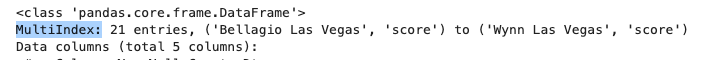

In [74]:
# notice this has two indexes 

# we need to drop one (score) which is redundant

---

In [75]:
by_hotel.apply(score_detail2).reset_index(level = 1, drop = True)

5    4    2    3    1
hotel_name                                                                 
Bellagio Las Vegas                                 0.50 0.33 0.12 0.04  NaN
Caesars Palace                                     0.50 0.29  NaN 0.12 0.08
Circus Circus Hotel & Casino Las Vegas             0.08 0.38 0.17 0.29 0.08
Encore at wynn Las Vegas                           0.71 0.21  NaN 0.04 0.04
Excalibur Hotel & Casino                           0.17 0.42 0.04 0.38  NaN
Hilton Grand Vacations at the Flamingo             0.38 0.29 0.08 0.25  NaN
Hilton Grand Vacations on the Boulevard            0.50 0.33 0.08 0.04 0.04
Marriott's Grand Chateau                           0.58 0.38  NaN 0.04  NaN
Monte Carlo Resort&Casino                          0.08 0.42 0.21 0.25 0.04
Paris Las Vegas                                    0.42 0.33 0.12 0.12  NaN
The Cosmopolitan Las Vegas                         0.62 0.21 0.12  NaN 0.04
The Cromwell                                       0.50 0.25 0.08 0.12 0.04
The Palazzo Resort Hotel Casino                    0.54 0.29  NaN 0.17  NaN
The Venetian Las Vegas Hotel                       0.62 0.33  NaN 0.04  NaN
The Westin las Vegas Hotel Casino & Spa            0.25 0.46 0.04 0.25  NaN
Treasure Island- TI Hotel & Casino                 0.21 0.54  NaN 0.25  NaN
Tropicana Las Vegas - A Double Tree by Hilton H... 0.38 0.42 0.04 0.12 0.04
Trump International Hotel Las Vegas                0.62 0.25 0.04 0.04 0.04
Tuscany Las Vegas Suites & Casino                  0.54 0.17 0.04 0.25  NaN
Wyndham Grand Desert                               0.50 0.38  NaN 0.12  NaN
Wynn Las Vegas                                     0.75 0.17 0.04 0.04  NaN

In [76]:
by_hotel.apply(score_detail2).reset_index(level = 1, drop = True).fillna(0)

5    4    2    3    1
hotel_name                                                                 
Bellagio Las Vegas                                 0.50 0.33 0.12 0.04 0.00
Caesars Palace                                     0.50 0.29 0.00 0.12 0.08
Circus Circus Hotel & Casino Las Vegas             0.08 0.38 0.17 0.29 0.08
Encore at wynn Las Vegas                           0.71 0.21 0.00 0.04 0.04
Excalibur Hotel & Casino                           0.17 0.42 0.04 0.38 0.00
Hilton Grand Vacations at the Flamingo             0.38 0.29 0.08 0.25 0.00
Hilton Grand Vacations on the Boulevard            0.50 0.33 0.08 0.04 0.04
Marriott's Grand Chateau                           0.58 0.38 0.00 0.04 0.00
Monte Carlo Resort&Casino                          0.08 0.42 0.21 0.25 0.04
Paris Las Vegas                                    0.42 0.33 0.12 0.12 0.00
The Cosmopolitan Las Vegas                         0.62 0.21 0.12 0.00 0.04
The Cromwell                                       0.50 0.25 0.08 0.12 0.04
The Palazzo Resort Hotel Casino                    0.54 0.29 0.00 0.17 0.00
The Venetian Las Vegas Hotel                       0.62 0.33 0.00 0.04 0.00
The Westin las Vegas Hotel Casino & Spa            0.25 0.46 0.04 0.25 0.00
Treasure Island- TI Hotel & Casino                 0.21 0.54 0.00 0.25 0.00
Tropicana Las Vegas - A Double Tree by Hilton H... 0.38 0.42 0.04 0.12 0.04
Trump International Hotel Las Vegas                0.62 0.25 0.04 0.04 0.04
Tuscany Las Vegas Suites & Casino                  0.54 0.17 0.04 0.25 0.00
Wyndham Grand Desert                               0.50 0.38 0.00 0.12 0.00
Wynn Las Vegas                                     0.75 0.17 0.04 0.04 0.00

In [77]:
# store as df

In [78]:
score_df = by_hotel.apply(score_detail2).reset_index(level = 1, drop = True).fillna(0)

In [79]:
score_df.head(5)

5    4    2    3    1
hotel_name                                                     
Bellagio Las Vegas                     0.50 0.33 0.12 0.04 0.00
Caesars Palace                         0.50 0.29 0.00 0.12 0.08
Circus Circus Hotel & Casino Las Vegas 0.08 0.38 0.17 0.29 0.08
Encore at wynn Las Vegas               0.71 0.21 0.00 0.04 0.04
Excalibur Hotel & Casino               0.17 0.42 0.04 0.38 0.00

---

# plot

## Amazing

In [82]:
import seaborn as sns

<AxesSubplot:ylabel='hotel_name'>

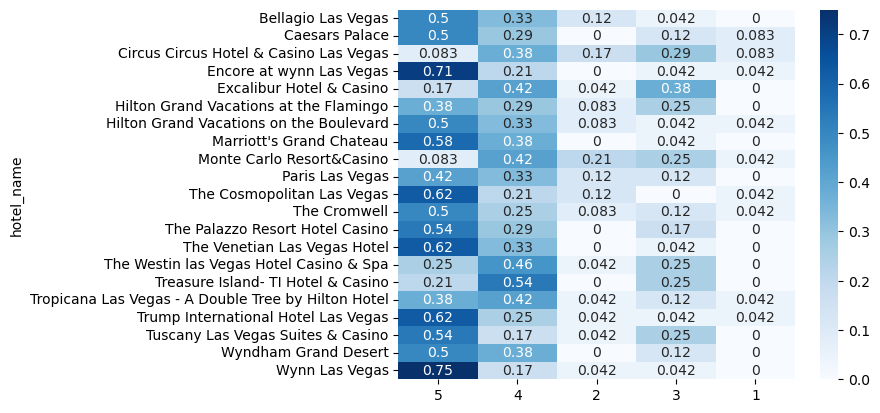

In [81]:
sns.heatmap(score_df, annot = True, cmap = 'Blues')

---

# Example 3

### where the reviewers from each hotel are coming from

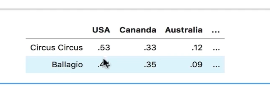

In [83]:
# each column should have a fraction of the reviewers from the coutnry

In [84]:
# only include the top 10 most common countries

In [85]:
# in the last step, pandas will group each row together

In [86]:
# good thing is that we ahve one row

In [91]:
def country_counts(groupdf):
    return groupdf.user_country.value_counts()

In [88]:
country_counts(sample_group)

USA           10
UK             5
Canada         5
New Zeland     2
India          1
Australia      1
Name: user_country, dtype: int64

---

In [92]:
def country_counts(groupdf):
    return groupdf.user_country.value_counts(normalize = True)

In [93]:
country_counts(sample_group)

USA          0.42
UK           0.21
Canada       0.21
New Zeland   0.08
India        0.04
Australia    0.04
Name: user_country, dtype: float64

In [94]:
by_hotel.apply(country_counts)

hotel_name                    
Bellagio Las Vegas  USA          0.33
                    UK           0.25
                    India        0.08
                    Ireland      0.08
                    Australia    0.04
                                 ... 
Wynn Las Vegas      Canada       0.21
                    UK           0.17
                    Singapore    0.04
                    Finland      0.04
                    Costa Rica   0.04
Name: user_country, Length: 182, dtype: float64

In [95]:
# pull out the ten countries you want

In [97]:
top_countries = Vegas.user_country.value_counts()
top_countries

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Egypt                     5
Brazil                    5
New Zeland                5
Singapore                 4
Netherlands               4
Norway                    3
Israel                    3
Malaysia                  3
Hawaii                    3
Thailand                  3
Finland                   3
Spain                     2
United Arab Emirates      2
Scotland                  2
Switzerland               2
Costa Rica                2
Kenya                     1
Korea                     1
Japan                     1
Czech Republic            1
Kuwait                    1
Taiwan                    1
Denmark                   1
Honduras                  1
Saudi Arabia              1
Iran                      1
China                     1
Jordan              

In [98]:
top_countries = Vegas.user_country.value_counts().index
top_countries

Index(['USA', 'UK', 'Canada', 'Australia', 'Ireland', 'India', 'Mexico',
       'Germany', 'Egypt', 'Brazil', 'New Zeland', 'Singapore', 'Netherlands',
       'Norway', 'Israel', 'Malaysia', 'Hawaii', 'Thailand', 'Finland',
       'Spain', 'United Arab Emirates', 'Scotland', 'Switzerland',
       'Costa Rica', 'Kenya', 'Korea', 'Japan', 'Czech Republic', 'Kuwait',
       'Taiwan', 'Denmark', 'Honduras', 'Saudi Arabia', 'Iran', 'China',
       'Jordan', 'Greece', 'France', 'Syria', 'Puerto Rico', 'Belgium',
       'India ', 'Phillippines', 'South Africa', 'Swiss', 'Croatia', 'Hungary',
       'Italy'],
      dtype='object')

In [100]:
top_countries = Vegas.user_country.value_counts().index.values
top_countries

array(['USA', 'UK', 'Canada', 'Australia', 'Ireland', 'India', 'Mexico',
       'Germany', 'Egypt', 'Brazil', 'New Zeland', 'Singapore',
       'Netherlands', 'Norway', 'Israel', 'Malaysia', 'Hawaii',
       'Thailand', 'Finland', 'Spain', 'United Arab Emirates', 'Scotland',
       'Switzerland', 'Costa Rica', 'Kenya', 'Korea', 'Japan',
       'Czech Republic', 'Kuwait', 'Taiwan', 'Denmark', 'Honduras',
       'Saudi Arabia', 'Iran', 'China', 'Jordan', 'Greece', 'France',
       'Syria', 'Puerto Rico', 'Belgium', 'India ', 'Phillippines',
       'South Africa', 'Swiss', 'Croatia', 'Hungary', 'Italy'],
      dtype=object)

In [105]:
top_countries = Vegas.user_country.value_counts().index.values[:10]
top_countries

array(['USA', 'UK', 'Canada', 'Australia', 'Ireland', 'India', 'Mexico',
       'Germany', 'Egypt', 'Brazil'], dtype=object)

---

In [102]:
# only retain contries in teh value_counts array

In [103]:
def country_counts(groupdf):
    return groupdf.user_country.value_counts(normalize = True)[top_countries]

In [106]:
country_counts(sample_group)

KeyError: "['Ireland', 'Mexico', 'Germany', 'Egypt', 'Brazil'] not in index"

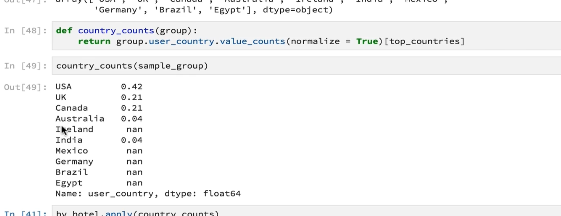

In [107]:
# getting error

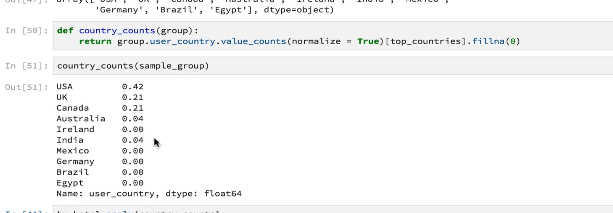

In [108]:
def country_counts(groupdf):
    return groupdf.user_country.value_counts(normalize = True)[top_countries].fillna(0)

In [109]:
country_counts(sample_group)

KeyError: "['Ireland', 'Mexico', 'Germany', 'Egypt', 'Brazil'] not in index"

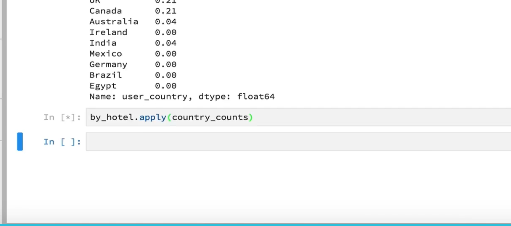

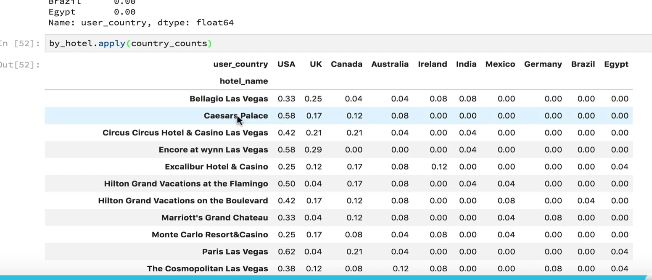

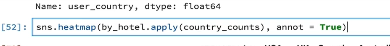

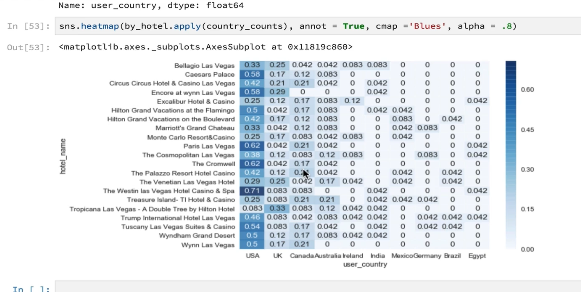